In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")


In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns
df["NumOfProducts"].unique()
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df_1=df.copy()
df_1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
geography=pd.get_dummies(df["Geography"],drop_first="False")
gender=pd.get_dummies(df["Gender"],drop_first="False")


In [14]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [15]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [16]:
df=pd.concat([df,geography,gender],axis=1)

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [18]:
df.drop(['Geography','Gender',],axis=1,inplace=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
df.drop('Exited',axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
x=df.drop("Exited", axis=1)
y=df['Exited']

In [22]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [26]:
print('X Train Shape:{},Y Train Shape {}'.format(x_train.shape,y_train.shape))

X Train Shape:(8000, 11),Y Train Shape (8000,)


In [27]:
print('X Test Shape:{},Y Test Shape {}'.format(x_test.shape,y_test.shape))

X Test Shape:(2000, 11),Y Test Shape (2000,)


In [28]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


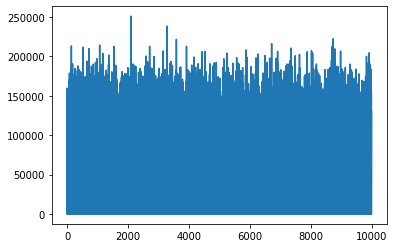

In [29]:
df["Balance"].plot()

In [30]:
df["Balance"].nunique()

6382

In [31]:
df["Balance"].max()

250898.09

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()

In [34]:
x_train=sc.fit_transform(x_train)

In [35]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [36]:
x_test=sc.transform(x_test)

In [37]:
import keras

In [38]:
from keras.models import Sequential

In [39]:
from keras.layers import Dense

In [40]:
classifier=Sequential()

In [41]:
classifier.add(Dense(units=6, activation="relu", input_dim=11))

In [42]:
classifier.add(Dense(units=6, activation="relu"))

In [43]:
classifier.add(Dense(units=1, activation="sigmoid"))

In [44]:
import tensorflow as tf

classifier.compile(optimizer='adam',loss = "binary_crossentropy",
              metrics=['accuracy'])

In [45]:
model_history=classifier.fit(x_train, y_train,batch_size=10,validation_split=0.33,epochs=25)

Epoch 1/25
536/536 [==============================] - 6s 8ms/step - loss: 0.5846 - accuracy: 0.7223 - val_loss: 0.4804 - val_accuracy: 0.7963
Epoch 2/25
536/536 [==============================] - 3s 5ms/step - loss: 0.4486 - accuracy: 0.8046 - val_loss: 0.4382 - val_accuracy: 0.8061
Epoch 3/25
536/536 [==============================] - 2s 4ms/step - loss: 0.4249 - accuracy: 0.8119 - val_loss: 0.4308 - val_accuracy: 0.8133
Epoch 4/25
536/536 [==============================] - 2s 3ms/step - loss: 0.4155 - accuracy: 0.8156 - val_loss: 0.4241 - val_accuracy: 0.8118
Epoch 5/25
536/536 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8216 - val_loss: 0.4131 - val_accuracy: 0.8160
Epoch 6/25
536/536 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8291 - val_loss: 0.4041 - val_accuracy: 0.8220
Epoch 7/25
536/536 [==============================] - 2s 3ms/step - loss: 0.3867 - accuracy: 0.8341 - val_loss: 0.3966 - val_accuracy: 0.8315
Epoch 

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
import matplotlib.pyplot as plt

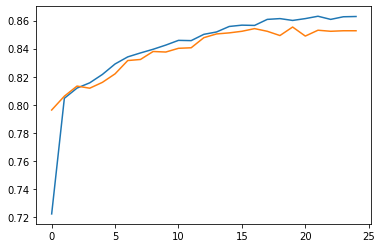

In [48]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])


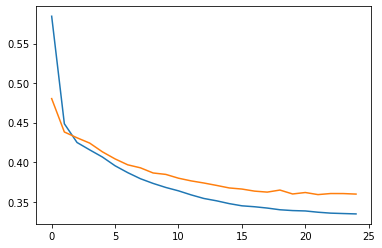

In [49]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])


In [50]:
y_pred=classifier.predict(x_test)

In [51]:
y_pred

array([[0.33811656],
       [0.34205434],
       [0.18718532],
       ...,
       [0.19944867],
       [0.15455985],
       [0.23687601]], dtype=float32)

In [52]:
y_pred=(y_pred>0.5)

In [53]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm=confusion_matrix(y_test,y_pred)

In [56]:
cm

array([[1503,   92],
       [ 194,  211]])

In [58]:
from sklearn.metrics import accuracy_score

In [60]:
score=accuracy_score(y_pred,y_test)

In [61]:
score

0.857

In [63]:
def predict_exit(sample_values):
  sample_value=np.array(sample_values)
  sample_values=sample_values.reshape(1,-1)
  sample_values=sc.transform(sample_values)
  return classifier.predict(sample_values)

In [74]:
sample_values=[660,10,5,0.00,2,1,0,163830.64,0,0,1]

In [75]:
sample_value=np.array(sample_values)

In [82]:
sample_values=sample_value.reshape(1,-1)

In [83]:
 sample_values=sc.transform(sample_values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [85]:
classifier.predict(sample_values)

array([[0.00208685]], dtype=float32)